# Scratchpad for testing out graphlab with project data

In [81]:
import json
import numpy as np
import graphlab as gl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load in user-item-rating data...

In [82]:
# create Pandas DF with data pulled from Postgres (restaurant only reviews)
df = pd.read_csv('data_analysis/user_reviews.csv', header=None,
                 names=['user_id', 'business_id', 'bus_name', 'stars', 'locale'])

In [83]:
df.head()

,user_id,business_id,bus_name,stars,locale
0,Ouus3lC3Xk3YRGx4ptd_4A,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,2,"Las Vegas, NV"
1,dz_sBsL69aWzsxksT2O_Mg,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,2,"Las Vegas, NV"
2,zyI-u0C1YOzp5v1j2wuCOQ,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,3,"Las Vegas, NV"
3,vyfsQo-estP8EfiIFMsL6g,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,3,"Las Vegas, NV"
4,lxZSVeJz6KEBW1nlA3JKJg,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,1,"Las Vegas, NV"


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363242 entries, 0 to 1363241
Data columns (total 5 columns):
user_id        1363242 non-null object
business_id    1363242 non-null object
bus_name       1363242 non-null object
stars          1363242 non-null int64
locale         1363242 non-null object
dtypes: int64(1), object(4)
memory usage: 52.0+ MB


In [84]:
# store the observation data in Graphlab's SFrame type
sf_obs = gl.SFrame(df[['user_id', 'business_id', 'stars']])

In [85]:
sf_obs.head()

user_id,business_id,stars
Ouus3lC3Xk3YRGx4ptd_4A,DW6SI2KxcfXBHeo9jEr4lQ,2
dz_sBsL69aWzsxksT2O_Mg,DW6SI2KxcfXBHeo9jEr4lQ,2
zyI-u0C1YOzp5v1j2wuCOQ,DW6SI2KxcfXBHeo9jEr4lQ,3
vyfsQo-estP8EfiIFMsL6g,DW6SI2KxcfXBHeo9jEr4lQ,3
lxZSVeJz6KEBW1nlA3JKJg,DW6SI2KxcfXBHeo9jEr4lQ,1
CbMCOeeHVeafcD-6-CJrPg,DW6SI2KxcfXBHeo9jEr4lQ,4
Z8DyUMojRhFbLyHBymM_rA,DW6SI2KxcfXBHeo9jEr4lQ,2
sXWvDlMQspjJ1zzr3cEM7Q,DW6SI2KxcfXBHeo9jEr4lQ,2
G8RaaiVzbyRvsBmoUx0VeA,DW6SI2KxcfXBHeo9jEr4lQ,1
f0isFKnJVZVmpdCPNd8Gfw,DW6SI2KxcfXBHeo9jEr4lQ,1


# Quick EDA

## Group reviews by users...

In [77]:
# number of reviews by user (388k distinct users)
reviews_by_user = sf_obs.groupby('user_id', [gl.aggregate.COUNT()]).sort('Count', ascending=False)['Count']
reviews_by_user[0:10]

dtype: int
Rows: 10
[817, 782, 754, 666, 665, 655, 611, 601, 563, 525]

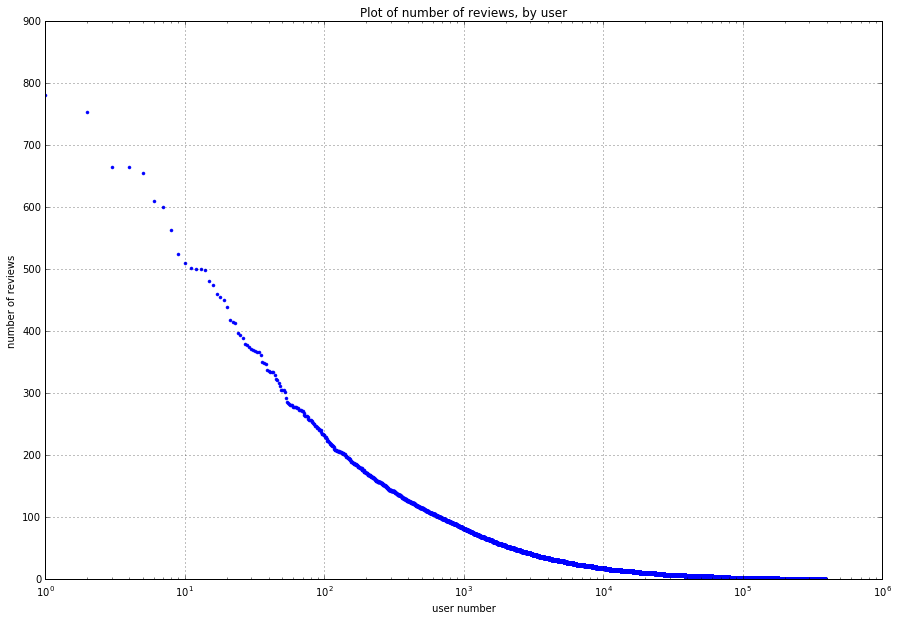

In [95]:
plt.figure(figsize=(15,10))
plt.semilogx(reviews_by_user, '.');
plt.grid()
plt.xlabel('user number')
plt.ylabel('number of reviews')
plt.title('Plot of number of reviews, by user')

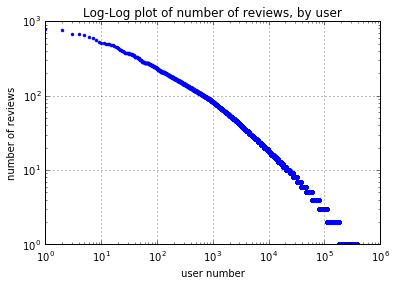

In [62]:
plt.loglog(reviews_by_user, '.');
plt.grid()
plt.xlabel('user number')
plt.ylabel('number of reviews')
plt.title('Log-Log plot of number of reviews, by user')

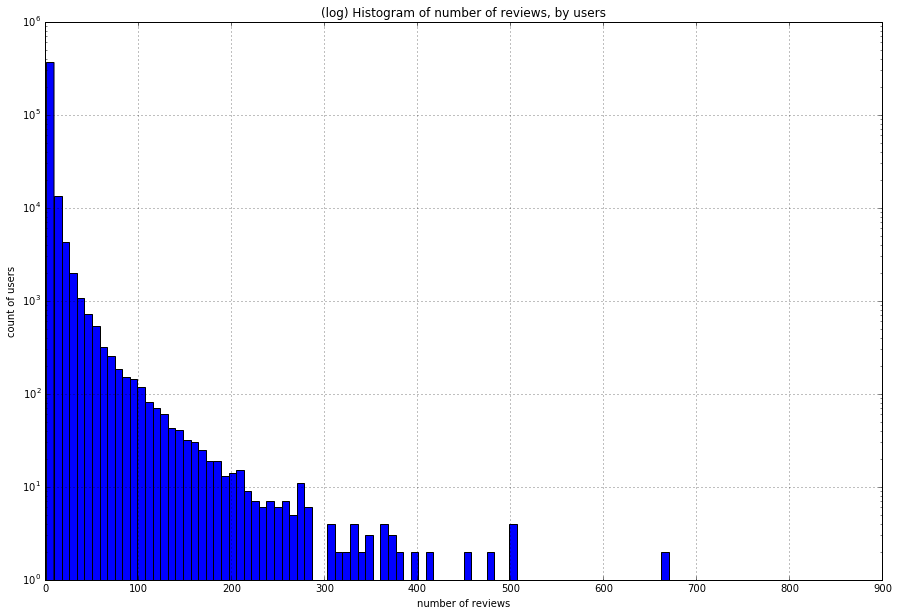

In [98]:
plt.figure(figsize=(15,10))
plt.hist(reviews_by_user, bins=100, log=True, cumulative=False);
plt.grid()
plt.xlabel('number of reviews')
plt.ylabel('count of users')
plt.title('(log) Histogram of number of reviews, by users')

## Group reviews by restaurants...

In [78]:
# number of reviews by restaurant (25k distinct restaurants)
reviews_by_biz = sf_obs.groupby('business_id', [gl.aggregate.COUNT()]).sort('Count', ascending=False)['Count']
reviews_by_biz[0:10]

dtype: int
Rows: 10
[5042, 3958, 3896, 3788, 3405, 3086, 2876, 2704, 2589, 2576]

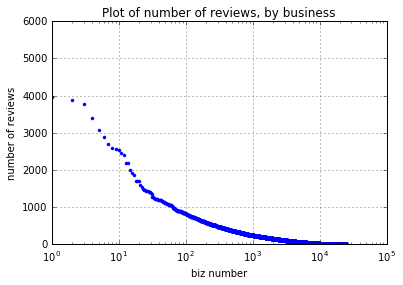

In [57]:
plt.semilogx(reviews_by_biz, '.');
plt.grid()
plt.xlabel('biz number')
plt.ylabel('number of reviews')
plt.title('Plot of number of reviews, by business')

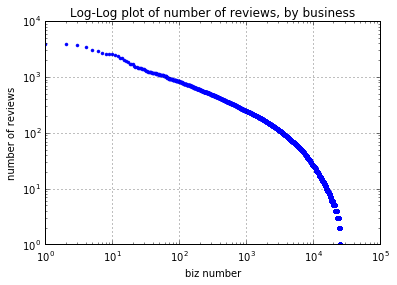

In [63]:
plt.loglog(reviews_by_biz, '.');
plt.grid()
plt.xlabel('biz number')
plt.ylabel('number of reviews')
plt.title('Log-Log plot of number of reviews, by business')

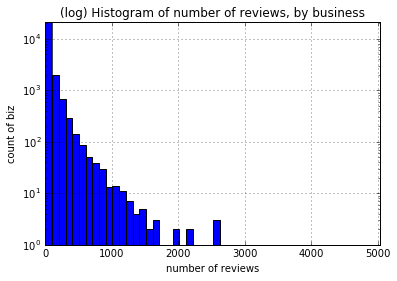

In [67]:
plt.hist(reviews_by_biz, bins=50, log=True);
plt.grid()
plt.autoscale(tight=True)
plt.xlabel('number of reviews')
plt.ylabel('count of biz')
plt.title('(log) Histogram of number of reviews, by business')

1

## Load in business.json file as 'item_data', for side data factorization...

In [12]:
# create Pandas DF from json business data
fname_test = 'data_analysis/test_data/test100_business.json'
fname_full = '../data/Yelp/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
# 'data_analysis/full_data/yelp_academic_dataset_business.json'

In [13]:
fname = fname_full
with open(fname) as js_file:
    js_list = [json.loads(js_line) for js_line in js_file]
    js_list_filtered = [js for js in js_list if 'Restaurants' in js['categories']]
    dfb = pd.DataFrame(js_list_filtered)

In [14]:
print '{} = Orig business list size'.format(len(js_list))
print '{} = Restaurant list size'.format(len(js_list_filtered))

77445 = Orig business list size
25071 = Restaurant list size


In [15]:
dfb.head(3)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.413464,-79.880247,Emil's Lounge,[],True,20,5.0,PA,business
2,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'11...",40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],True,21,4.0,PA,business


In [16]:
# quick peek at business_id and name
dfb[['business_id', 'name']].head()

,business_id,name
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie
1,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge
2,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill
3,wJr6kSA5dchdgOdwH6dZ2w,Kings Family Restaurant
4,fNGIbpazjTRdXgwRY_NIXA,Rocky's Lounge


### Handle the 'attribute' field

which contains nested json fields...

In [17]:
# handle the attribute field...
df_att = pd.io.json.json_normalize(dfb['attributes'])
df_att.columns = ['Attributes.'+col for col in df_att.columns]
df_att.head()

,Attributes.Accepts Credit Cards,Attributes.Accepts Insurance,Attributes.Ages Allowed,Attributes.Alcohol,Attributes.Ambience.casual,Attributes.Ambience.classy,Attributes.Ambience.divey,Attributes.Ambience.hipster,Attributes.Ambience.intimate,Attributes.Ambience.romantic,...,Attributes.Parking.street,Attributes.Parking.valet,Attributes.Parking.validated,Attributes.Price Range,Attributes.Smoking,Attributes.Take-out,Attributes.Takes Reservations,Attributes.Waiter Service,Attributes.Wheelchair Accessible,Attributes.Wi-Fi
0,True,NaN,NaN,none,False,False,False,False,False,False,...,False,False,False,1.0,NaN,True,False,False,NaN,NaN
1,True,NaN,NaN,full_bar,False,False,False,False,False,False,...,False,False,False,1.0,no,True,False,True,NaN,no
2,True,NaN,NaN,full_bar,True,False,False,False,False,False,...,False,False,False,1.0,outdoor,True,False,True,NaN,free
3,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,1.0,NaN,True,False,True,True,NaN
4,True,NaN,NaN,full_bar,False,False,False,False,False,False,...,False,False,False,1.0,no,True,False,True,True,free


In [18]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25071 entries, 0 to 25070
Data columns (total 63 columns):
Attributes.Accepts Credit Cards                23547 non-null object
Attributes.Accepts Insurance                   2 non-null object
Attributes.Ages Allowed                        27 non-null object
Attributes.Alcohol                             20531 non-null object
Attributes.Ambience.casual                     19136 non-null object
Attributes.Ambience.classy                     19136 non-null object
Attributes.Ambience.divey                      18548 non-null object
Attributes.Ambience.hipster                    19012 non-null object
Attributes.Ambience.intimate                   19136 non-null object
Attributes.Ambience.romantic                   19136 non-null object
Attributes.Ambience.touristy                   19136 non-null object
Attributes.Ambience.trendy                     19136 non-null object
Attributes.Ambience.upscale                    19029 non-null object
A

Wow... lot of NaN / Null. How to handle this?

### Handle the 'categories' field

Which is a flat list of categories.

The data has already been filtered down to contain 'Restaurants' in the field.

Found hint/solution here: http://datascience.stackexchange.com/questions/8253/how-to-binary-encode-multi-valued-categorical-variable-from-pandas-dataframe

In [19]:
import collections

In [20]:
dfb[['categories']].head()

,categories
0,"[Fast Food, Restaurants]"
1,"[Bars, American (New), Nightlife, Lounges, Res..."
2,"[Bars, American (Traditional), Nightlife, Rest..."
3,"[Burgers, Breakfast & Brunch, American (Tradit..."
4,"[Bars, American (Traditional), Nightlife, Loun..."


In [21]:
# apply collections.counter() to get a dict of hashable objects...
dfb_cat_dict = dfb['categories'].apply(collections.Counter)
dfb_cat_dict.head()

0                 {u'Restaurants': 1, u'Fast Food': 1}
1    {u'Bars': 1, u'Restaurants': 1, u'Nightlife': ...
2    {u'American (Traditional)': 1, u'Bars': 1, u'N...
3    {u'American (Traditional)': 1, u'Burgers': 1, ...
4    {u'American (Traditional)': 1, u'Bars': 1, u'N...
Name: categories, dtype: object

In [22]:
df_cat_full = pd.DataFrame.from_records(dfb_cat_dict).fillna(value=0).astype(int)
df_cat_full.head()

,Active Life,Adult Entertainment,Afghan,African,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Antiques,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wine Bars,Wineries,Wok,Yoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_cat_full.columns

Index([u'Active Life', u'Adult Entertainment', u'Afghan', u'African',
       u'Alsatian', u'Amateur Sports Teams', u'American (New)',
       u'American (Traditional)', u'Amusement Parks', u'Antiques',
       ...
       u'Uzbek', u'Vegan', u'Vegetarian', u'Venezuelan',
       u'Venues & Event Spaces', u'Vietnamese', u'Wine Bars', u'Wineries',
       u'Wok', u'Yoga'],
      dtype='object', length=296)

In [27]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat = ['Active Life', 'Amateur Sports Teams', 'Amusement Parks', 'Antiques', 'Apartments',
               'Appliances', 'Arcades', 'Art Galleries', 'Arts & Crafts', 'Arts & Entertainment',
               'Auto Repair', 'Automotive', 'Banks & Credit Unions', 'Beauty & Spas', 'Bed & Breakfast',
               'Bikes', 'Boating', 'Books, Mags, Music & Video', 'Bookstores', 'Bowling']

In [30]:
# df_cat_full.head().T[0:50]

In [28]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Building Supplies', 'Butcher', 'Candy Stores', 'Car Wash', 'Caterers', 'Chocolatiers & Shops',
                'Coffee & Tea Supplies', 'Colleges & Universities', 'Convenience Stores', 'Cooking Schools',
                'Country Clubs', 'Country Dance Halls', 'DJs', 'Dance Clubs', 'Day Spas', 'Department Stores']

In [31]:
# df_cat_full.head().T[50:100]

In [29]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Discount Store', 'Do-It-Yourself Food', 'Dry Cleaning & Laundry', 'Education',
                'Event Planning & Services', 'Fashion', 'Festivals', 'Financial Services',
                'Fitness & Instruction', 'Flea Markets', 'Flowers & Gifts', 'Food Delivery Services',
                'Food Tours', 'Furniture Stores', 'Gas & Service Stations', 'Gay Bars', 'Golf', 'Grocery',
                'Guest Houses', 'Hardware Stores']

In [32]:
# df_cat_full.head().T[100:150]

In [33]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Health & Medical', 'Health Markets', 'Heating & Air Conditioning/HVAC', 'Herbs & Spices',
                'Hiking', 'Hobby Shops', 'Home & Garden', 'Home Decor', 'Home Services', 'Hotels', 'Hotels & Travel',
                'Jazz & Blues', 'Karaoke', 'Kids Activities', 'Kitchen & Bath', 'Lakes',
                'Landmarks & Historical Buildings', 'Leisure Centers', 'Local Services', 'Lounges', 'Meat Shops']

In [34]:
# df_cat_full.head().T[150:200]

In [35]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Music Venues', 'Musicians', 'Nightlife', 'Nutritionists', 'Organic Stores', 'Parking',
                'Party & Event Planning', 'Pasta Shops', 'Patisserie/Cake Shop', 'Performing Arts',
                'Personal Chefs', 'Pet Services', 'Pets', 'Piano Bars', 'Plumbing', 'Pool Halls',
                'Public Services & Government', 'Real Estate', 'Shopping']

In [36]:
# df_cat_full.head().T[200:250]

In [37]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Shopping Centers', 'Soccer', 'Social Clubs', 'Specialty Schools', 'Sporting Goods', 'Sports Clubs',
                'Sports Wear', 'Street Vendors', 'Swimming Pools', 'Tea Rooms', 'Tours', 'Toy Stores',
                'Travel Services', 'Venues & Event Spaces', 'Wine Bars', 'Yoga']

In [38]:
# df_cat_full.head().T[250:]

In [42]:
print '{} = number of orig categories'.format(len(df_cat_full.T))
print '{} = number of excluded categories'.format(len(exclude_cat))
print 'Exclusion categories:\n', exclude_cat

296 = number of orig categories
112 = number of excluded categories
Exclusion categories:
['Active Life', 'Amateur Sports Teams', 'Amusement Parks', 'Antiques', 'Apartments', 'Appliances', 'Arcades', 'Art Galleries', 'Arts & Crafts', 'Arts & Entertainment', 'Auto Repair', 'Automotive', 'Banks & Credit Unions', 'Beauty & Spas', 'Bed & Breakfast', 'Bikes', 'Boating', 'Books, Mags, Music & Video', 'Bookstores', 'Bowling', 'Building Supplies', 'Butcher', 'Candy Stores', 'Car Wash', 'Caterers', 'Chocolatiers & Shops', 'Coffee & Tea Supplies', 'Colleges & Universities', 'Convenience Stores', 'Cooking Schools', 'Country Clubs', 'Country Dance Halls', 'DJs', 'Dance Clubs', 'Day Spas', 'Department Stores', 'Discount Store', 'Do-It-Yourself Food', 'Dry Cleaning & Laundry', 'Education', 'Event Planning & Services', 'Fashion', 'Festivals', 'Financial Services', 'Fitness & Instruction', 'Flea Markets', 'Flowers & Gifts', 'Food Delivery Services', 'Food Tours', 'Furniture Stores', 'Gas & Service Sta

Drop the categories in the exclusion list

In [43]:
df_cat = df_cat_full.drop(exclude_cat, axis=1)
df_cat.head()

,Adult Entertainment,Afghan,African,Alsatian,American (New),American (Traditional),Arabian,Argentine,Armenian,Asian Fusion,...,Trinidadian,Turkish,Ukrainian,Uzbek,Vegan,Vegetarian,Venezuelan,Vietnamese,Wineries,Wok
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combining the 'categories' and 'attributes' into item data

In [44]:
# df_item_data = pd.concat([dfb[['business_id', 'name']] , df_cat, df_att], axis=1)

df_item_data = pd.concat([dfb[['business_id', 'name']] , df_cat], axis=1) # categories for now...
df_item_data.head()

,business_id,name,Adult Entertainment,Afghan,African,Alsatian,American (New),American (Traditional),Arabian,Argentine,...,Trinidadian,Turkish,Ukrainian,Uzbek,Vegan,Vegetarian,Venezuelan,Vietnamese,Wineries,Wok
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wJr6kSA5dchdgOdwH6dZ2w,Kings Family Restaurant,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fNGIbpazjTRdXgwRY_NIXA,Rocky's Lounge,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# convert to SFrame...
sf_itemdata = gl.SFrame(df_item_data)

# Setup the train/test data split...

In [46]:
sf_obs.shape

(1363242, 3)

In [47]:
sf_obs.column_names()

['user_id', 'business_id', 'stars']

In [48]:
# split the test data via Graphlab's recommender tailored splitter function
train_set, test_set = gl.recommender.util.random_split_by_user(sf_obs,
                                                               'user_id',
                                                               'business_id',
                                                               max_num_users=100)

In [49]:
train_set

user_id,business_id,stars
Ouus3lC3Xk3YRGx4ptd_4A,DW6SI2KxcfXBHeo9jEr4lQ,2
dz_sBsL69aWzsxksT2O_Mg,DW6SI2KxcfXBHeo9jEr4lQ,2
zyI-u0C1YOzp5v1j2wuCOQ,DW6SI2KxcfXBHeo9jEr4lQ,3
vyfsQo-estP8EfiIFMsL6g,DW6SI2KxcfXBHeo9jEr4lQ,3
lxZSVeJz6KEBW1nlA3JKJg,DW6SI2KxcfXBHeo9jEr4lQ,1
CbMCOeeHVeafcD-6-CJrPg,DW6SI2KxcfXBHeo9jEr4lQ,4
Z8DyUMojRhFbLyHBymM_rA,DW6SI2KxcfXBHeo9jEr4lQ,2
sXWvDlMQspjJ1zzr3cEM7Q,DW6SI2KxcfXBHeo9jEr4lQ,2
G8RaaiVzbyRvsBmoUx0VeA,DW6SI2KxcfXBHeo9jEr4lQ,1
f0isFKnJVZVmpdCPNd8Gfw,DW6SI2KxcfXBHeo9jEr4lQ,1


In [50]:
test_set

user_id,business_id,stars
pE7qSGfe4MWWEPYSoqY34Q,A-wbnt6g19IWirBswkzsig,3
H7zTsX10fKk-qgTUFK2wiQ,1dprSfGrxNxgYiuYcmb3FQ,4
NLCew4oPUtPvAbP0RAdEpg,wNUea3IXZWD63bbOQaOH-g,3
Gnr3eh08NuIufa6suMYu-w,YCKOz3ja7i3nbavwdf6lWQ,5
hNZ6Zpx841Pwla4HBUg3jA,9tSHBEoAhKu-tkU8n6SKjA,5
s6M4t4M7LBa1iZXNViBJpQ,SsTxjxo8qvqBMvan1rzNzg,1
zh9ep0B_gvLEIIU39iaWsA,EnQewGyKYsME5gchmyvsPg,2
DWvKVtLEnVD37sumfzfE3A,AVQG9O8zAnW_f2a8MU8b2A,4
Rz4uxa3SDYz2j4luErp_YQ,-PESvVv3rPQFAU1_cZ8_hw,5
o4MPZ7LQVjA0I_x2RB1tVg,9JTxqwSxtsf2xERoBtTTsg,5


# Run the recommender...

In [51]:
# create the recommender (will train during this step)
rec = gl.recommender.create(
            train_set,
            user_id='user_id',
            item_id='business_id',
            target='stars',
            item_data=sf_itemdata)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1363188 observations with 388605 users and 25071 items.

Data prepared in: 1.79913s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 170398 / 1363188 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1                 | Not Viable                               |

| 1       | 0.25              | Not Viable                               |

| 2       | 0.0625            | Not Viable                               |

| 3       | 0.015625          | 2.67104                                  |

| 4       | 0.0078125         | 2.90572                                  |

| 5       | 0.00390625        | 2.987                                    |

| 6       | 0.00195312        | No Decrease (3.32616 >= 3.32058)         |

+---------+-------------------+------------------------------------------+

| Final   | 0.015625          | 2.67104                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 131us        | 3.32572           | 1.30232               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 54.47s       | 2.99684           | 1.26291               | 0.015625    |

| 2       | 1m 46s       | 2.82506           | 1.24001               | 0.015625    |

| 3       | 2m 38s       | 2.74005           | 1.23905               | 0.015625    |

| 4       | 3m 29s       | 2.68677           | 1.23888               | 0.015625    |

| 5       | 4m 41s       | DIVERGED          | DIVERGED              | 0.015625    |

| RESET   | 5m 3s        | 3.32562           | 1.30232               |             |

| 1       | 5m 56s       | 3.09948           | 1.26356               | 0.0078125   |

| 2       | 6m 48s       | 2.96108           | 1.24692               | 0.0078125   |

| 3       | 7m 40s       | 2.89789           | 1.24339               | 0.0078125   |

| 4       | 8m 32s       | 2.85358           | 1.2422                | 0.0078125   |

| 5       | 9m 25s       | 2.82211           | 1.24939               | 0.0078125   |

| 6       | 10m 19s      | 4.43657           | 1.68038               | 0.0078125   |

| 7       | 11m 25s      | DIVERGED          | DIVERGED              | 0.0078125   |

| RESET   | 11m 47s      | 3.32564           | 1.30231               |             |

| 1       | 12m 38s      | 3.2106            | 1.3153                | 0.00390625  |

| 2       | 13m 51s      | DIVERGED          | DIVERGED              | 0.00390625  |

| RESET   | 14m 12s      | 3.32558           | 1.30231               |             |

| 1       | 15m 6s       | 3.25045           | 1.29833               | 0.00195312  |

| 2       | 16m 0s       | 3.06047           | 1.2693                | 0.00195312  |

| 3       | 16m 52s      | 3.029             | 1.26942               | 0.00195312  |

| 4       | 17m 46s      | 3.18962           | 1.27372               | 0.00195312  |

| 5       | 18m 39s      | 3.29356           | 1.28534               | 0.00195312  |

| 6       | 19m 32s      | 3.85362           | 1.34946               | 0.00195312  |

| 7       | 20m 24s      | 3.66265           | 1.30444               | 0.00195312  |

| 8       | 21m 18s      | 3.43746           | 1.27939               | 0.00195312  |

| 9       | 22m 12s      | 3.4168            | 1.27592               | 0.00195312  |

| 10      | 23m 4s       | 3.41127           | 1.27498               | 0.00195312  |

| 11      | 23m 56s      | 3.4004            | 1.28297               | 0.00195312  |

| 12      | 24m 48s      | 3.51798           | 1.35716               | 0.00195312  |

| 13      | 26m 2s       | DIVERGED          | DIVERGED              | 0.00195312  |

| RESET   | 26m 23s      | 3.32565           | 1.30232               |             |

| 1       | 27m 15s      | 3.29323           | 1.29485               | 0.000976562 |

[ERROR] graphlab.toolkits._main: Toolkit error: Cancelled by user.


ToolkitError: Cancelled by user.

In [ ]:
# rec = gl.recommender.create(
#             sf_obj,
#             user_id='user_id',
#             item_id='business_id',
#             target ='stars')

In [ ]:
# evaluate 1 datapoint (user=1, business=100) for potential rating
one_datapoint_sf = graphlab.SFrame({'user_id': [1], 'business_id': [100]})
print "stars:", rec.predict(one_datapoint_sf)[0]   # 4.879

In [ ]:
rec.list_fields()

In [ ]:
rec.get('coefficients')['intercept']

In [ ]:
# rec['coefficients']  # equivalent to: rec.get('coefficients')
rec.get('coefficients')['user_id']

In [ ]:
# rec['coefficients']  # equivalent to: rec.get('coefficients')
rec.get('coefficients')['business_id']

In [ ]:
business_sf = rec['coefficients']['business_id']
print len(business_sf)                     # 1682
print len(business_sf['factors'][0])       # 8
user_sf = rec['coefficients']['user_id']
print len(user_sf)                      # 943
print len(user_sf['factors'][0])        # 8

In [ ]:
import os

In [ ]:
os.path.getsize()

In [ ]:
import progressbar

In [ ]:
progressbar.__version__

In [ ]:
bar = progressbar.ProgressBar

scratch pad...

If [0, 1, 2] are numerical labels and is not the index, then pandas.DataFrame.pivot_table works:

This blog post was helpful: http://pbpython.com/pandas-pivot-table-explained.html

In [ ]:
data = pd.DataFrame.from_records(
    [[0, 'A'], [0, 'B'], [1, 'B'], [1, 'C'], [1, 'D'], [2, 'B'], [2, 'D']],
    columns=['number_label', 'category'])
data

In [ ]:
data.pivot_table(index=['number_label'], columns=['category'], aggfunc=[len], fill_value=0)

If [0, 1, 2] is the index, then collections.Counter is useful:

In [ ]:
data2 = pd.DataFrame.from_dict({'categories': {0: ['A', 'B'],
                                               1: ['B', 'C', 'D'],
                                               2:['B', 'D']}})
data2

In [ ]:
import collections

In [ ]:
data3 = data2['categories'].apply(collections.Counter)
data3

In [ ]:
pd.DataFrame.from_records(data3).fillna(value=0).astype(int)

In [ ]:
collections.Counter